#**<center><font color="red">Image classification with 10 categories</center>**

#**PROBLEM STATEMENT**
- To design and implement a deep learning-based image classification system using a selected 10-class subset of the ImageNet dataset.

- To build and evaluate a Convolutional Neural Network (CNN) model that accurately classifies images into 10 distinct object categories, enabling advancements in automated visual recognition systems and supporting practical applications in computer vision.

#**DOMAIN ANALYSIS AND DATA INFORMATION**
- Image classification is a core task in computer vision, involving the identification and categorization of objects within images. The ImageNet dataset is one of the most widely recognized large-scale datasets for training and evaluating image classification models, containing millions of labeled images across thousands of categories.

- In this project, a selected subset of 10 specific ImageNet categories is used to simplify experimentation while preserving the complexity and variability of real-world visual data. Each class in the subset represents a unique and visually distinct object, making it suitable for benchmarking deep learning models.

- This domain is particularly significant in the development of intelligent systems for automation, surveillance, visual search engines, robotics, and other applications that rely on accurate and fast visual recognition.

- To effectively classify the images, a Convolutional Neural Network (CNN) is trained on labeled data, learning hierarchical visual features and generalizing to unseen images. The dataset is structured into training, testing, and validation sets to evaluate model performance and ensure generalization.

---
#**CLASSES**
The dataset includes 10 object categories, each representing a visually distinct real-world object:

- Tench

- Springer

- Casette Player

- Chain Saw

- Church

- French Horn

- Garbage Truck

- Gas Pump

- Golf Ball

- Parachute

#**1. MOUNTING THE DRIVE**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


#**2. IMPORTING LIBRARIES**

In [ ]:
import cv2
import os
import zipfile
import random
import shutil
from PIL import Image

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import pathlib
from pathlib import Path

import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.callbacks import ReduceLROnPlateau

from sklearn.metrics import confusion_matrix, classification_report

#**3. EXTRACTING DATASET FROM ZIP FILE**

In [ ]:
with zipfile.ZipFile("/content/drive/MyDrive/Project4/imagenet-subset-10.zip") as zip_ref:
  zip_ref.extractall("/content/drive/MyDrive/Project4")

#**4. BASIC CHECKS**

In [ ]:
data_path = '/content/drive/MyDrive/Project4/imagenet subset/'
original_train_folder = '/content/drive/MyDrive/Project4/imagenet subset/train'
original_val_folder = '/content/drive/MyDrive/Project4/imagenet subset/val'

In [ ]:
# Mapping from folder name to class label
imagenette_map = {
    "n01440764" : "tench",
    "n02102040" : "springer",
    "n02979186" : "casette_player",
    "n03000684" : "chain_saw",
    "n03028079" : "church",
    "n03394916" : "French_horn",
    "n03417042" : "garbage_truck",
    "n03425413" : "gas_pump",
    "n03445777" : "golf_ball",
    "n03888257" : "parachute"
}

###**4.1. TRAIN**

In [ ]:
class_folders = [folder for folder in os.listdir(original_train_folder) if os.path.isdir(os.path.join(original_train_folder, folder))]
total_images = sum(
    len([f for f in os.listdir(os.path.join(original_train_folder, folder)) if os.path.isfile(os.path.join(original_train_folder, folder, f))])
    for folder in class_folders
)
print(f"Total number of class folders: {len(class_folders)}")
print(f"Total number of images in Train folder: {total_images}")

Total number of class folders: 10
Total number of images in Train folder: 9469


In [ ]:
print("Image counts in Train folder:")
for folder_name, label_name in imagenette_map.items():
    class_path = os.path.join(original_train_folder, folder_name)
    if not os.path.exists(class_path):
        print(f"[MISSING] Folder not found: {class_path}")
        continue

    # Count all files (assuming all are images)
    image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
    print(f"{label_name} ({folder_name}): {len(image_files)} images")

Image counts in Train folder:
tench (n01440764): 963 images
springer (n02102040): 955 images
casette_player (n02979186): 993 images
chain_saw (n03000684): 858 images
church (n03028079): 941 images
French_horn (n03394916): 956 images
garbage_truck (n03417042): 961 images
gas_pump (n03425413): 931 images
golf_ball (n03445777): 951 images
parachute (n03888257): 960 images


###**4.2. VAL**

In [ ]:
class_folders = [folder for folder in os.listdir(original_val_folder) if os.path.isdir(os.path.join(original_val_folder, folder))]
total_images = sum(
    len([f for f in os.listdir(os.path.join(original_val_folder, folder)) if os.path.isfile(os.path.join(original_val_folder, folder, f))])
    for folder in class_folders
)
print(f"Total number of class folders: {len(class_folders)}")
print(f"Total number of images in Val folder: {total_images}")

Total number of class folders: 10
Total number of images in Val folder: 3925


In [ ]:
print("Image counts in Val folder:")
for folder_name, label_name in imagenette_map.items():
    class_path = os.path.join(original_val_folder, folder_name)
    if not os.path.exists(class_path):
        print(f"[MISSING] Folder not found: {class_path}")
        continue

    # Count all files (assuming all are images)
    image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
    print(f"{label_name} ({folder_name}): {len(image_files)} images")

Image counts in Val folder:
tench (n01440764): 387 images
springer (n02102040): 395 images
casette_player (n02979186): 357 images
chain_saw (n03000684): 386 images
church (n03028079): 409 images
French_horn (n03394916): 394 images
garbage_truck (n03417042): 389 images
gas_pump (n03425413): 419 images
golf_ball (n03445777): 399 images
parachute (n03888257): 390 images


#**5. VISUALIZING ALL THE CLASSES (10 CLASSES)**

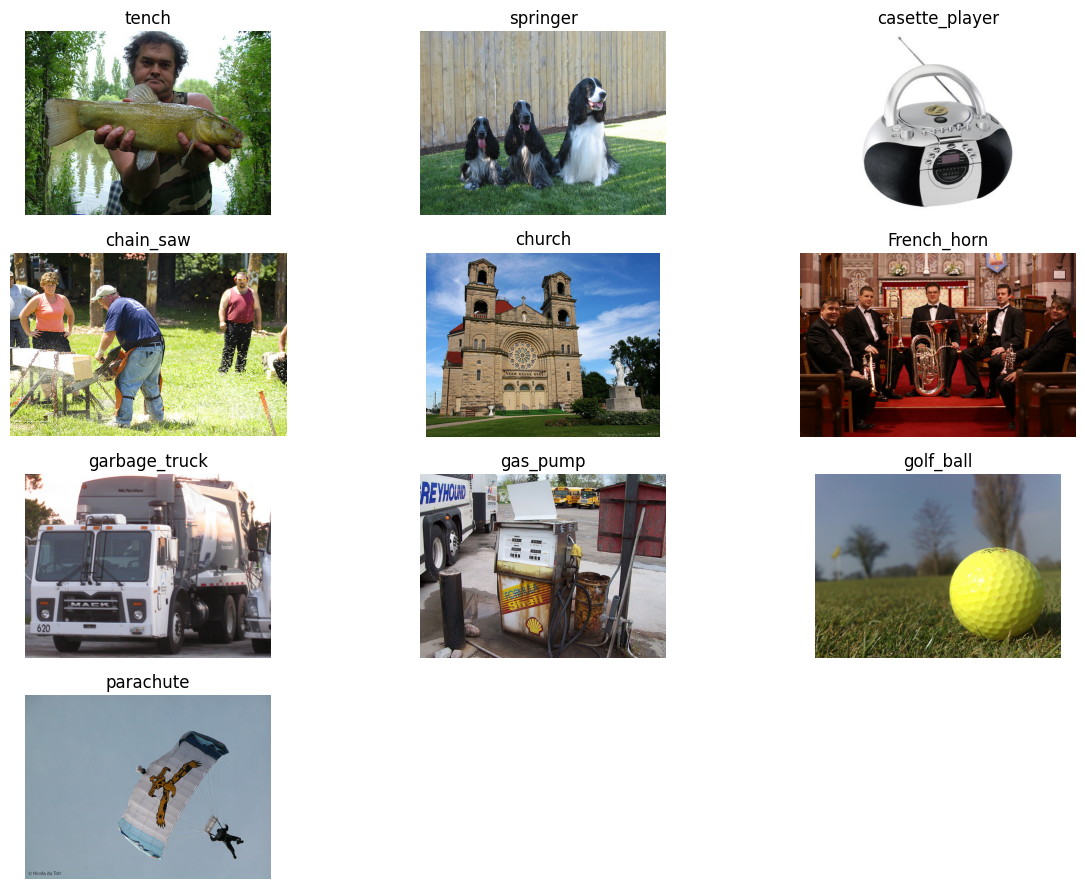

In [ ]:
folders = sorted(os.listdir(original_train_folder))
plt.figure(figsize=(12, 9))
for i in range(10):
    folder = folders[i]
    path = os.path.join(original_train_folder, folder)
    image = os.listdir(path)[11]
    img = Image.open(os.path.join(path, image))

    plt.subplot(4, 3, i + 1)
    plt.imshow(img)
    plt.title(imagenette_map[folder])
    plt.axis('off')
plt.tight_layout()
plt.show()

#**6. SPLIT CONFIGURATION**

In [ ]:
target_base_dir = '/content/drive/MyDrive/Project4/Splitted_dir'
split_ratio = 0.75
random.seed(42)

#**7. CREATING SPLIT FOLDERS**

In [ ]:
for split in ['train', 'test', 'val']:
    for label_name in imagenette_map.values():
        Path(f'{target_base_dir}/{split}/{label_name}').mkdir(parents=True, exist_ok=True)

#**8. SPLITTING AND COPYING FILES**

In [ ]:
for folder_name, label_name in imagenette_map.items():
    class_path = os.path.join(original_train_folder, folder_name)

    if not os.path.exists(class_path):
        print(f"[WARNING] Class path not found: {class_path}")
        continue

    files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    if not files:
        print(f"[WARNING] No image files found in {class_path}")
        continue

    random.shuffle(files)

    total = len(files)
    train_end = int(total * split_ratio)

    train_files = files[:train_end]
    test_files = files[train_end:]

    for file in train_files:
        src = os.path.join(class_path, file)
        dst = os.path.join(target_base_dir, 'train', label_name, file)
        shutil.copy2(src, dst)

    for file in test_files:
        src = os.path.join(class_path, file)
        dst = os.path.join(target_base_dir, 'test', label_name, file)
        shutil.copy2(src, dst)

    print(f"[INFO] {label_name}: {len(train_files)} train, {len(test_files)} test files copied.")

[INFO] tench: 722 train, 241 test files copied.
[INFO] springer: 716 train, 239 test files copied.
[INFO] casette_player: 744 train, 249 test files copied.
[INFO] chain_saw: 643 train, 215 test files copied.
[INFO] church: 705 train, 236 test files copied.
[INFO] French_horn: 717 train, 239 test files copied.
[INFO] garbage_truck: 720 train, 241 test files copied.
[INFO] gas_pump: 698 train, 233 test files copied.
[INFO] golf_ball: 713 train, 238 test files copied.
[INFO] parachute: 720 train, 240 test files copied.


In [ ]:
target_val_folder = '/content/drive/MyDrive/Project4/Splitted_dir/val'
total_copied = 0

for folder_name, label_name in imagenette_map.items():
    class_val_path = os.path.join(original_val_folder, folder_name)
    dest_path = os.path.join(target_val_folder, label_name)

    files = os.listdir(class_val_path)
    for file in files:
        src = os.path.join(class_val_path, file)
        dst = os.path.join(dest_path, file)
        shutil.copy2(src, dst)
        total_copied += 1

    print(f"[INFO] Copied {len(files)} images for {label_name}")

print(f"\n Total validation images copied: {total_copied}")

[INFO] Copied 387 images for tench
[INFO] Copied 395 images for springer
[INFO] Copied 357 images for casette_player
[INFO] Copied 386 images for chain_saw
[INFO] Copied 409 images for church
[INFO] Copied 394 images for French_horn
[INFO] Copied 389 images for garbage_truck
[INFO] Copied 419 images for gas_pump
[INFO] Copied 399 images for golf_ball
[INFO] Copied 390 images for parachute

 Total validation images copied: 3925


#**9. RESIZING IMAGES TO A UNIFORM SHAPE (128x128)**

In [ ]:
target_train_folder = "/content/drive/MyDrive/Project4/Splitted_dir/train"
img_size = 128
labels = os.listdir(target_train_folder)
def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[..., ::-1]  # Convert BGR to RGB
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data, dtype="object")

#**10. DATA PREPROCESSING**

In [ ]:
train = get_data("/content/drive/MyDrive/Project4/Splitted_dir/train")
print("There are {} images in train dataset".format(len(train)))
print("Each image has a dimension of : {}".format(train[i][0].shape))

There are 7098 images in train dataset
Each image has a dimension of : (128, 128, 3)


In [ ]:
test = get_data(r'/content/drive/MyDrive/Project4/Splitted_dir/test')
print("There are {} images in test dataset".format(len(test)))
print("Each image has a dimension of : {}".format(test[i][0].shape))

There are 2371 images in test dataset
Each image has a dimension of : (128, 128, 3)


In [ ]:
val = get_data(r'/content/drive/MyDrive/Project4/Splitted_dir/val')
print("There are {} images in val dataset".format(len(val)))
print("Each image has a dimension of : {}".format(val[i][0].shape))

There are 3925 images in val dataset
Each image has a dimension of : (128, 128, 3)


In [ ]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
  x_train.append(np.array(feature))
  y_train.append(int(label))

for feature, label in test:
    x_test.append(np.array(feature))
    y_test.append(int(label))

for feature, label in val:
  x_val.append(np.array(feature))
  y_val.append(int(label))

In [ ]:
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)

#**11. ONE-HOT ENCODING**

In [ ]:
num_classes = len(os.listdir(target_train_folder))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
y_val = to_categorical(y_val, num_classes)

#**12. MODEL CREATION**

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(128,128,3)))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 124, 124, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 120, 120, 32)   │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 60, 60, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 60, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 58, 58, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 56, 56, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    12,845,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,931,370 (49.33 MB)

 Trainable params: 12,931,370 (49.33 MB)

 Non-trainable params: 0 (0.00 B)

#**13. MODEL COMPILATION AND FITTING**

In [ ]:
model.compile(optimizer = "rmsprop" , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
history = model.fit(x_train,y_train, batch_size = 32 ,epochs = 16 , validation_data = (x_val, y_val) ,callbacks = [learning_rate_reduction])

Epoch 1/16
222/222 ━━━━━━━━━━━━━━━━━━━━ 746s 3s/step - accuracy: 0.1737 - loss: 2.3449 - val_accuracy: 0.3860 - val_loss: 1.7978 - learning_rate: 0.0010
Epoch 2/16
222/222 ━━━━━━━━━━━━━━━━━━━━ 724s 3s/step - accuracy: 0.3900 - loss: 1.7876 - val_accuracy: 0.4443 - val_loss: 1.6454 - learning_rate: 0.0010
Epoch 3/16
222/222 ━━━━━━━━━━━━━━━━━━━━ 722s 3s/step - accuracy: 0.5045 - loss: 1.5084 - val_accuracy: 0.5638 - val_loss: 1.3221 - learning_rate: 0.0010
Epoch 4/16
222/222 ━━━━━━━━━━━━━━━━━━━━ 719s 3s/step - accuracy: 0.6102 - loss: 1.2290 - val_accuracy: 0.5941 - val_loss: 1.2343 - learning_rate: 0.0010
Epoch 5/16
222/222 ━━━━━━━━━━━━━━━━━━━━ 719s 3s/step - accuracy: 0.6858 - loss: 0.9804 - val_accuracy: 0.5707 - val_loss: 1.3653 - learning_rate: 0.0010
Epoch 6/16
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7628 - loss: 0.7327
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
222/222 ━━━━━━━━━━━━━━━━━━━━ 722s 3s/step - accuracy: 0.7627 - loss: 0.732

#**14. VISUALIZING PLOTS**

##**14.1. ACCURACY PLOT**

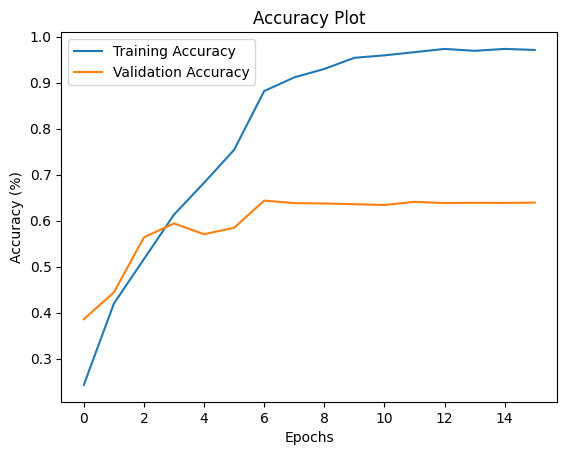

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'], label = "Training Accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation Accuracy")
plt.title("Accuracy Plot")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.show()

##**14.2. LOSS PLOT**

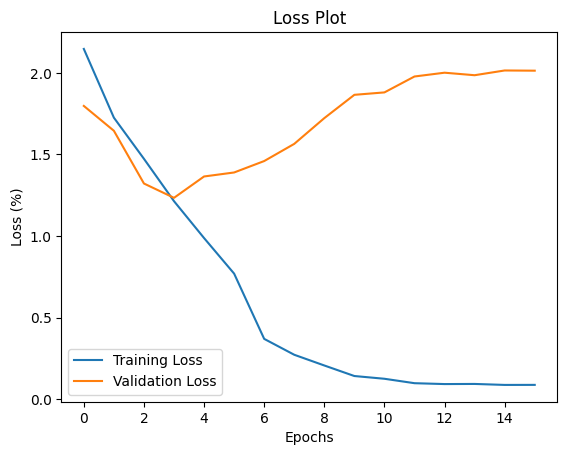

In [ ]:
plt.figure()
plt.plot(history.history['loss'], label = "Training Loss")
plt.plot(history.history['val_loss'], label = "Validation Loss")
plt.title("Loss Plot")
plt.xlabel("Epochs")
plt.ylabel("Loss (%)")
plt.legend()
plt.show()

#**15. MODEL PREDICTION**

In [ ]:
predictions = model.predict(x_test)
predicted_classes = predictions.argmax(axis=1)
print(predicted_classes)

75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 402ms/step
[4 0 0 ... 6 8 9]


#**16. CONFUSION MATRIX**

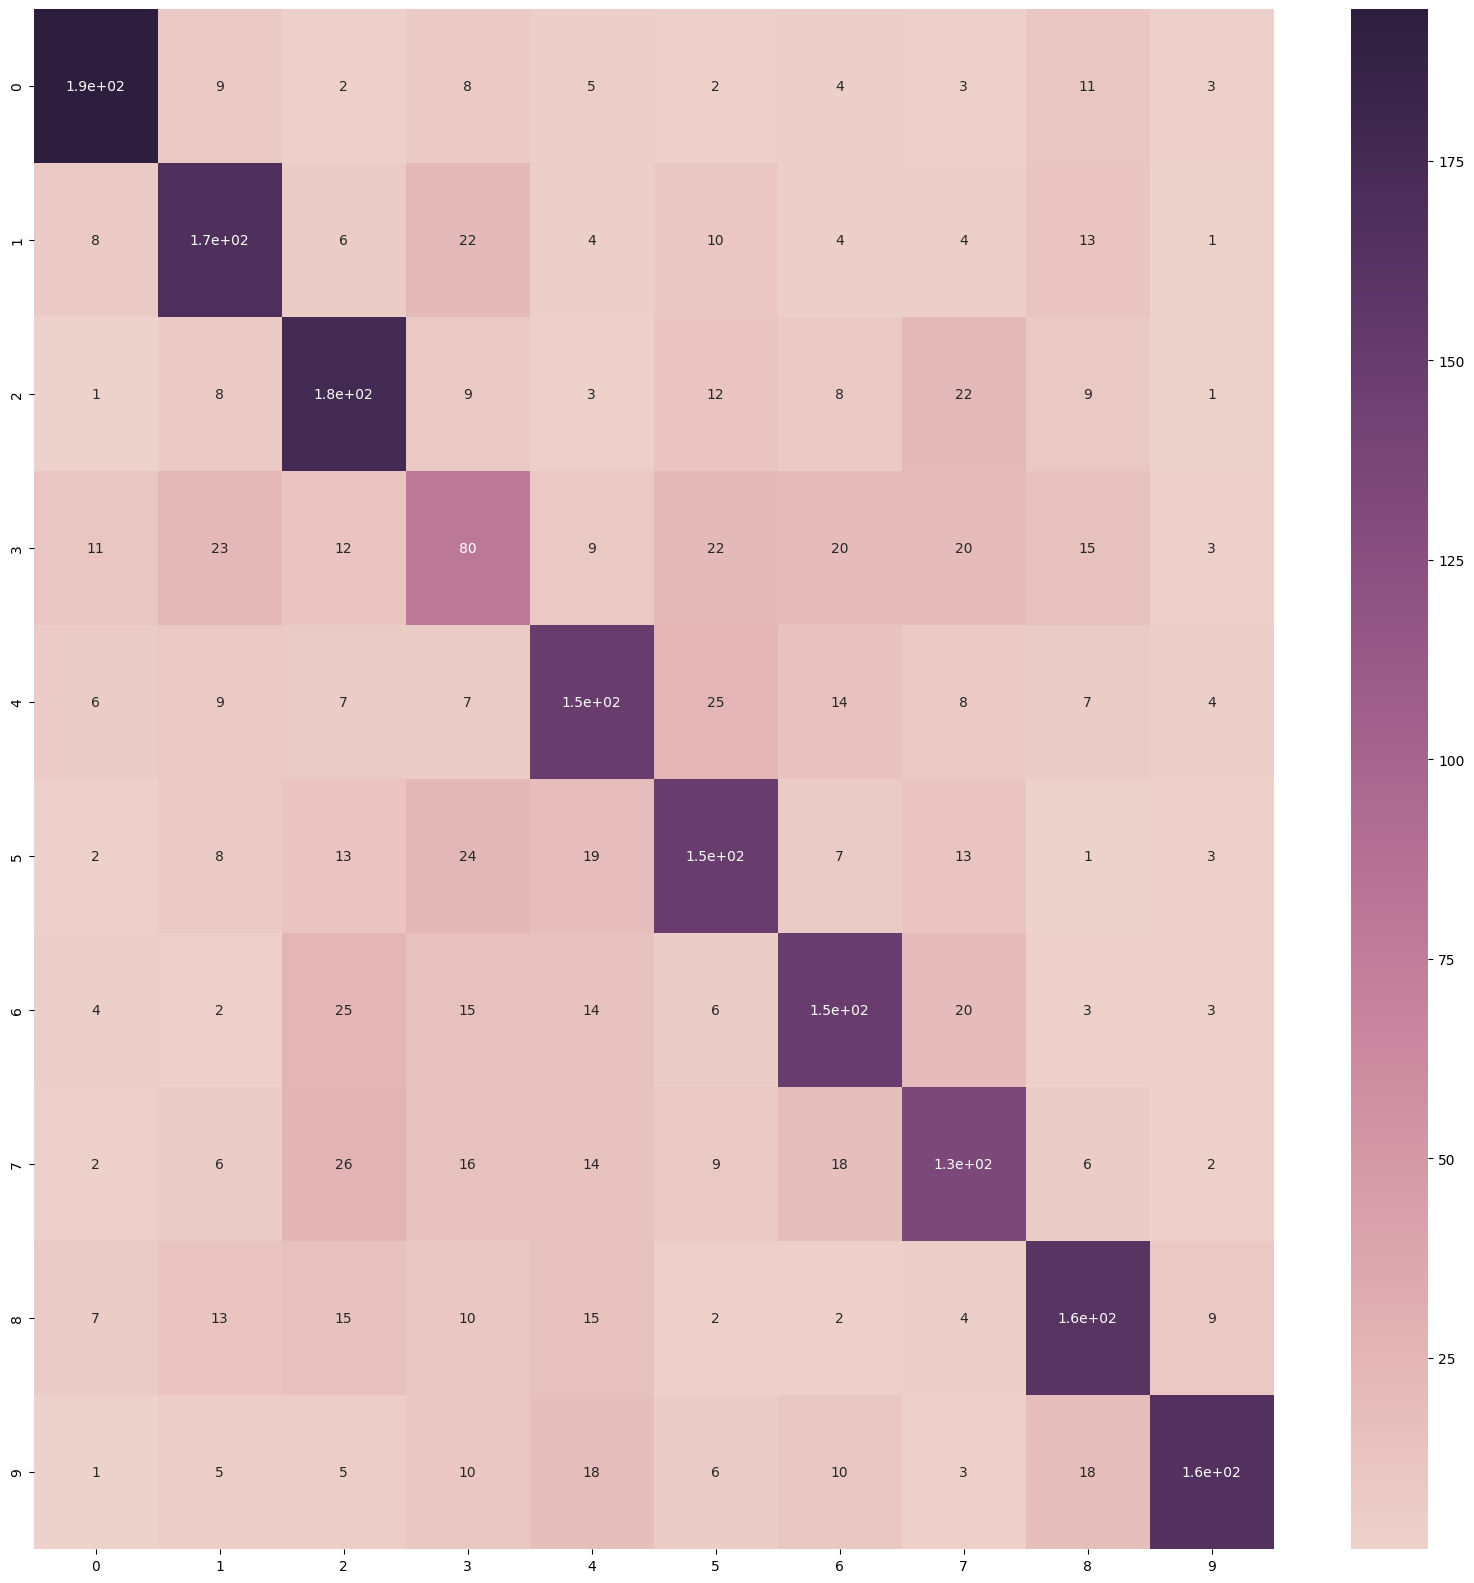

In [ ]:
y_test = y_test.argmax(axis=1)
cm = confusion_matrix(y_test, predicted_classes)
df_cm = pd.DataFrame(cm, index=[i for i in range(num_classes)], columns=[i for i in range(num_classes)])

plt.figure(figsize=(20, 20))
sns.heatmap(df_cm, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

#**17. CLASSIFICATION REPORT**

In [ ]:
print("Classification Report:\n")
print(classification_report(y_test, predicted_classes, digits=4))

Classification Report:

              precision    recall  f1-score   support

           0     0.8220    0.8050    0.8134       241
           1     0.6680    0.6987    0.6830       239
           2     0.6132    0.7068    0.6567       249
           3     0.3980    0.3721    0.3846       215
           4     0.5960    0.6314    0.6132       236
           5     0.6132    0.6234    0.6183       239
           6     0.6314    0.6183    0.6247       241
           7     0.5801    0.5751    0.5776       233
           8     0.6598    0.6765    0.6680       238
           9     0.8497    0.6833    0.7575       240

    accuracy                         0.6423      2371
   macro avg     0.6431    0.6391    0.6397      2371
weighted avg     0.6459    0.6423    0.6427      2371



#**18. TEST-IMAGE PREDICTIONS (GREEN: CORRECT, RED: INCORRECT)**

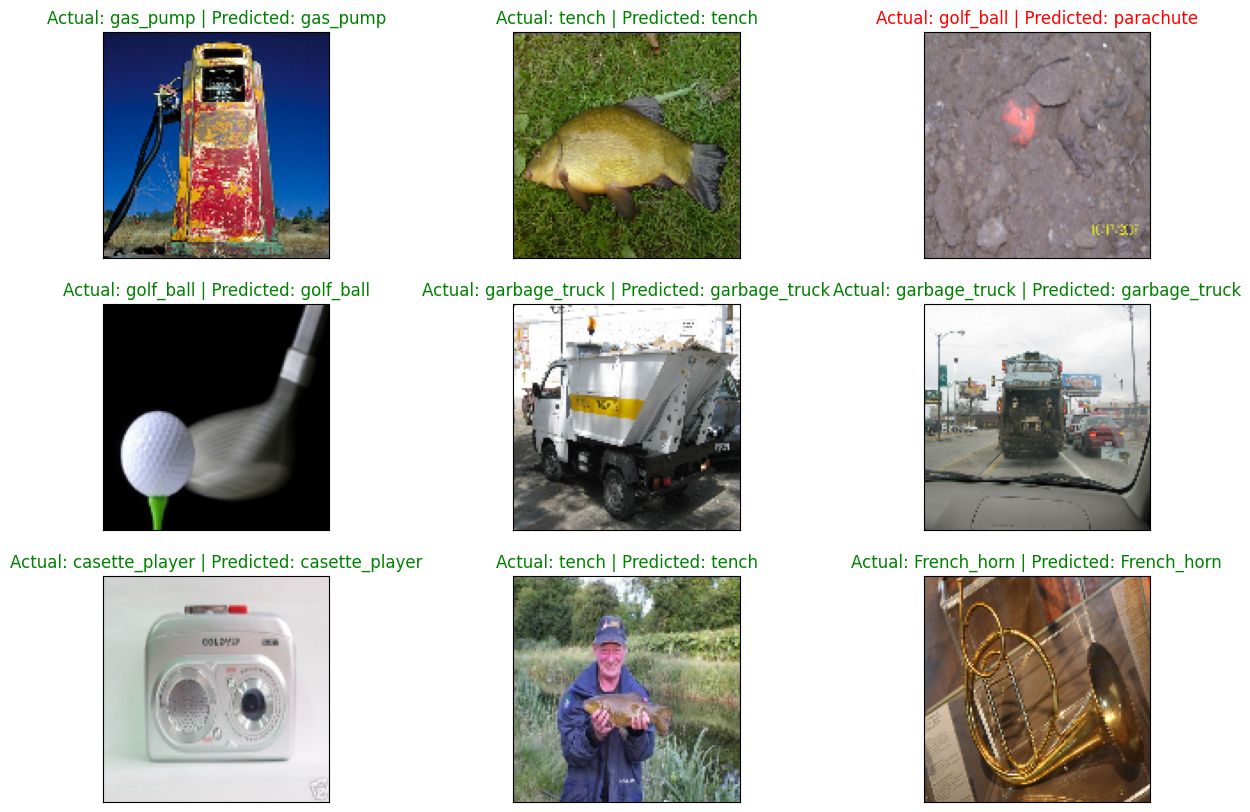

In [ ]:
if y_test.ndim > 1:
    y_test = y_test.argmax(axis=1)

fig = plt.figure(figsize=(15, 10))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=9, replace=False)):
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    image = x_test[idx].squeeze()
    ax.imshow(image, cmap='gray')

    pred_label = predicted_classes[idx]
    true_label = y_test[idx]

    ax.set_title(f"Actual: {labels[true_label]} | Predicted: {labels[pred_label]}",
                 color=("green" if pred_label == true_label else "red"))

#**19. CONCLUSION**

The Convolutional Neural Network (CNN) developed for the classification of 10 distinct object categories achieved strong performance, demonstrating reliable feature extraction and generalization across a diverse subset of the ImageNet dataset. With accurate predictions on test data and robust training-validation consistency, the model confirms its effectiveness in distinguishing between classes.

This outcome highlights the model’s practical utility in tasks requiring automated image recognition, such as visual inventory systems, real-time content filtering, and intelligent sorting.

For further enhancement and broader deployment, future work may involve integrating object detection frameworks like YOLOv8 or SSD with OpenCV for localization, applying advanced data augmentation, tuning hyperparameters, and leveraging transfer learning through pre-trained models such as ResNet50 or MobileNetV2 to improve both accuracy and efficiency on edge devices.

#**CHALLENGES FACED**


- Complexity of the model
- Took more computational time
- Hardware limitations